<a href="https://colab.research.google.com/github/Vishal64B/2MCAB/blob/main/2347264_CV_P4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#P4. Illustrate "Fourier Transform"
Decompose an image into its sine and cosine components and apply the following filters in frequency domain

4.1. Ideal Low Pass Filter

4.2. Ideal High Pass Filter

The task for today’s session is to enhance the quality of a satellite image(sample image
link). The image contains both high-frequency details and low-frequency components. To
analyze and improve the image quality, follow these steps:
1. Decompose the image using the Fourier Transform: Transform the image from the
spatial domain to the frequency domain.
2. Apply the following filtering techniques:

      a. Ideal Low Pass Filter

      b. Ideal High Pass Filter

      c. Butterworth Low Pass Filter

      d. Butterworth High Pass Filter

      e. Gaussian Low Pass Filter

      f. Gaussian High Pass Filter

3. Analyze with visualization proof, the impact of filter radius: Vary the cutoff radius for
each filter type and observe changes in image quality and frequency representation.

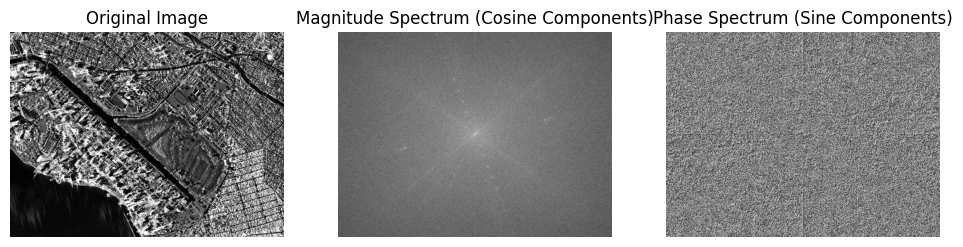

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Reading the grayscale image
img = cv2.imread("image.png", 0)  #0 -> indicates we are using grayscale image


# Step 2: Applying Fourier Transform to decompose into sine and cosine components
f_transform = np.fft.fft2(img)
f_transform_shifted = np.fft.fftshift(f_transform)  # Shift the zero frequency to the center


# Step 3: Extracting magnitude and phase (related to cosine and sine waves)
magnitude = np.abs(f_transform_shifted)  # Magnitude corresponds to the cosine wave's amplitude
phase = np.angle(f_transform_shifted)  # Phase corresponds to the sine wave's angle

# Step 4: Visualize the magnitude and phase spectra (sine and cosine waves decomposition)
plt.figure(figsize=(12, 6))

# Plotting original grayscale image
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plotting the magnitude spectrum
plt.subplot(1, 3, 2)
plt.imshow(np.log(magnitude + 1), cmap='gray')
plt.title('Magnitude Spectrum (Cosine Components)')
plt.axis('off')

# Plotting the phase spectrum
plt.subplot(1, 3, 3)
plt.imshow(phase, cmap='gray')
plt.title('Phase Spectrum (Sine Components)')
plt.axis('off')

plt.show()


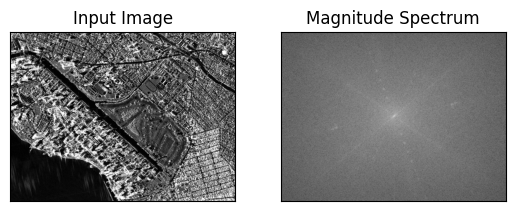

In [62]:
# Perform Fourier Transform
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

# Displaying the original image and its magnitude spectrum
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


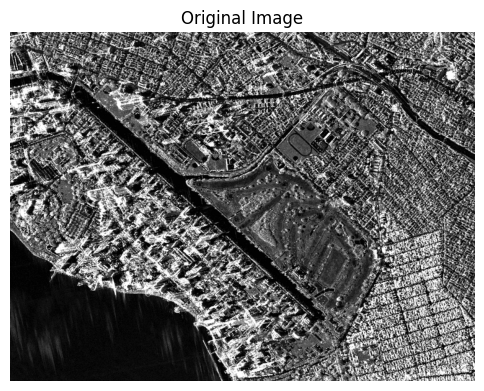

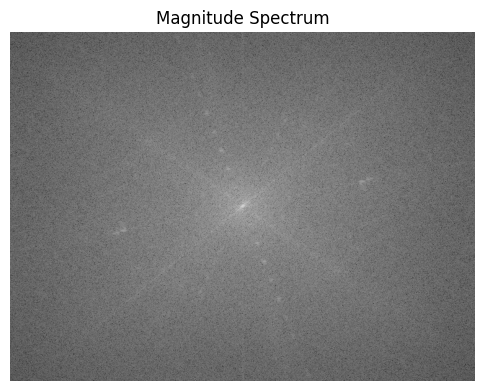

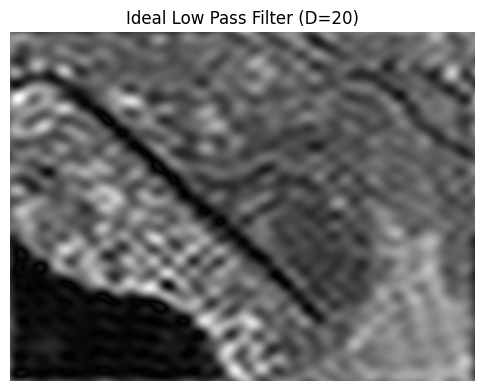

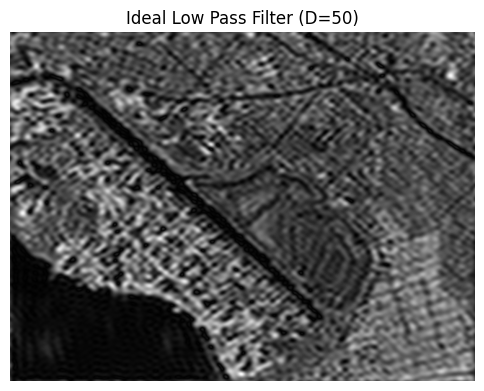

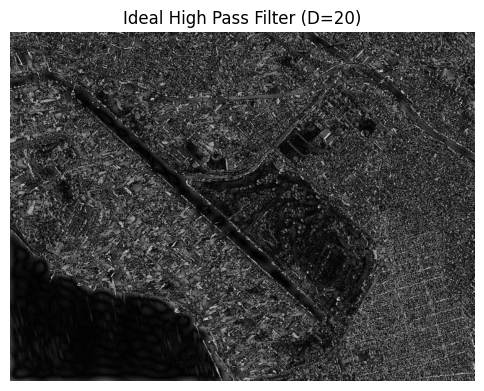

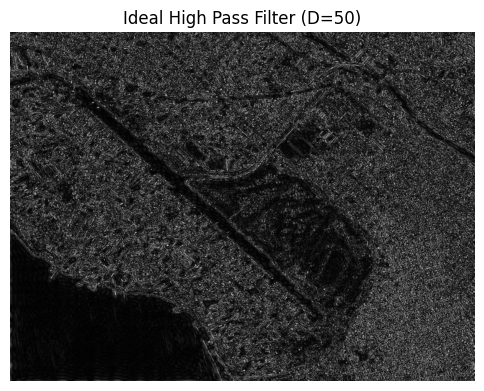

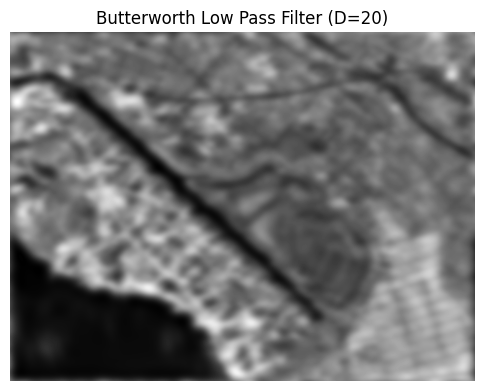

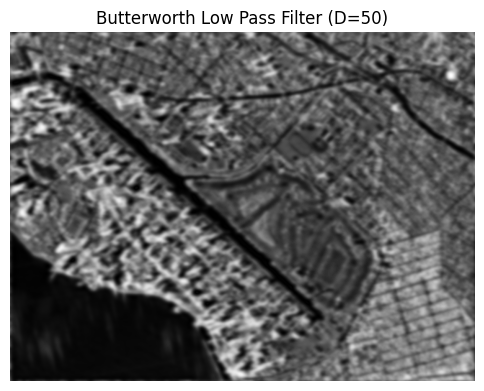

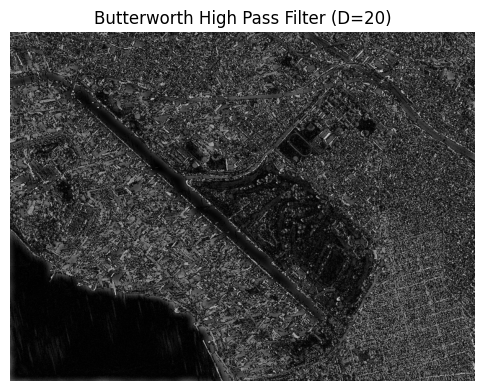

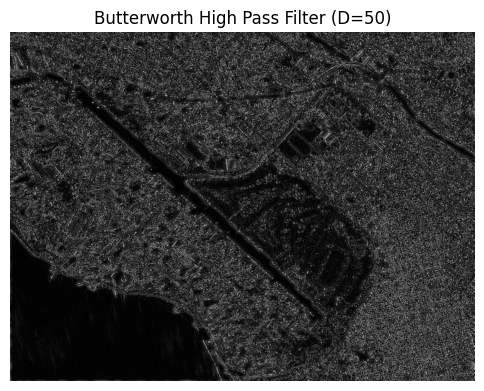

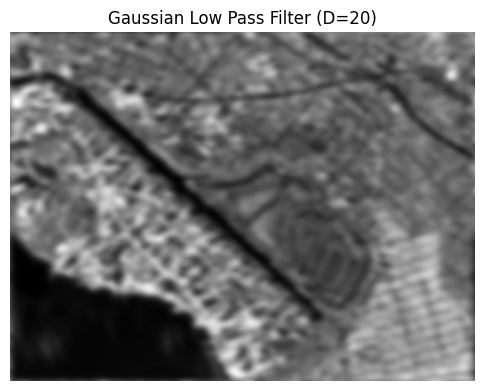

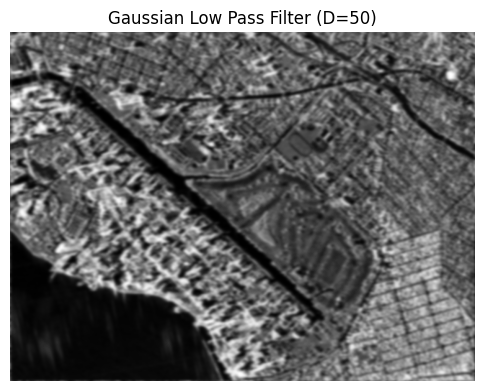

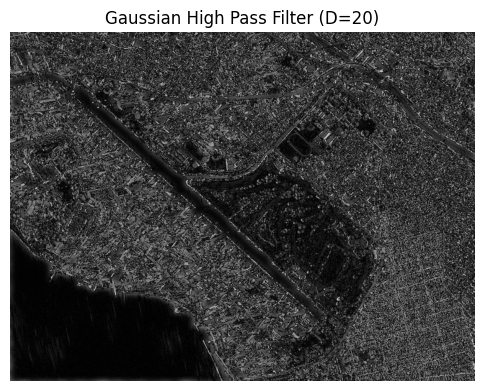

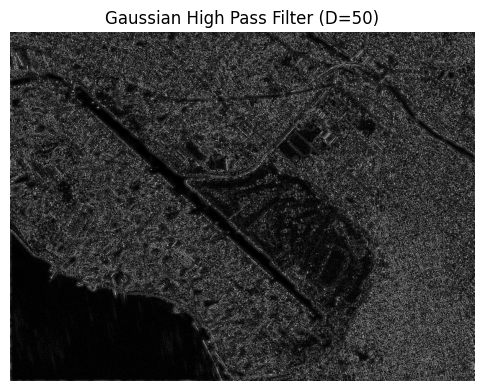

In [63]:
# Function to show the image
def show_image(title, image, cmap='gray'):
    plt.figure(figsize=(6,6))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Loading and converting the image to grayscale
image = cv2.imread('image.png', 0)
show_image("Original Image", image)

# Fourier Transform the image
dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)

# Magnitude Spectrum for visualization
magnitude_spectrum = 20 * np.log(np.abs(dft_shift))
show_image("Magnitude Spectrum", magnitude_spectrum)

# Creating filters
rows, cols = image.shape
crow, ccol = rows//2 , cols//2

# Ideal Low Pass Filter
def ideal_low_pass(dft_shift, D):
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow-D:crow+D, ccol-D:ccol+D] = 1
    return dft_shift * mask

# Ideal High Pass Filter
def ideal_high_pass(dft_shift, D):
    mask = np.ones((rows, cols), np.uint8)
    mask[crow-D:crow+D, ccol-D:ccol+D] = 0
    return dft_shift * mask

# Butterworth Low Pass Filter
def butterworth_low_pass(dft_shift, D, n):
    mask = np.zeros((rows, cols), np.float32)
    for u in range(rows):
        for v in range(cols):
            dist = np.sqrt((u - crow)**2 + (v - ccol)**2)
            mask[u, v] = 1 / (1 + (dist / D)**(2 * n))
    return dft_shift * mask

# Butterworth High Pass Filter
def butterworth_high_pass(dft_shift, D, n):
    mask = np.zeros((rows, cols), np.float32)
    epsilon = 1e-6
    for u in range(rows):
        for v in range(cols):
            dist = np.sqrt((u - crow)**2 + (v - ccol)**2) + epsilon
            mask[u, v] = 1 / (1 + (D / dist)**(2 * n))
    return dft_shift * mask


# Gaussian Low Pass Filter
def gaussian_low_pass(dft_shift, D):
    mask = np.zeros((rows, cols), np.float32)
    for u in range(rows):
        for v in range(cols):
            dist = np.sqrt((u - crow)**2 + (v - ccol)**2)
            mask[u, v] = np.exp(-(dist**2) / (2 * (D**2)))
    return dft_shift * mask

# Gaussian High Pass Filter
def gaussian_high_pass(dft_shift, D):
    mask = np.ones((rows, cols), np.float32)
    for u in range(rows):
        for v in range(cols):
            dist = np.sqrt((u - crow)**2 + (v - ccol)**2)
            mask[u, v] = 1 - np.exp(-(dist**2) / (2 * (D**2)))
    return dft_shift * mask

# Function to apply inverse Fourier Transform and display image
def apply_filter_and_show(dft_shift_filtered, title):
    # Apply inverse shift and inverse DFT
    f_ishift = np.fft.ifftshift(dft_shift_filtered)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    show_image(title, img_back)

# Apply filters twice with different cutoff radii and visualize results

cutoff_values = [20, 50]  # Two different cutoff radii for analysis

# Ideal Low Pass Filter
for D in cutoff_values:
    ideal_low_pass_filtered = ideal_low_pass(dft_shift, D=D)
    apply_filter_and_show(ideal_low_pass_filtered, f"Ideal Low Pass Filter (D={D})")

# Ideal High Pass Filter
for D in cutoff_values:
    ideal_high_pass_filtered = ideal_high_pass(dft_shift, D=D)
    apply_filter_and_show(ideal_high_pass_filtered, f"Ideal High Pass Filter (D={D})")

# Butterworth Low Pass Filter
for D in cutoff_values:
    butterworth_low_pass_filtered = butterworth_low_pass(dft_shift, D=D, n=2)
    apply_filter_and_show(butterworth_low_pass_filtered, f"Butterworth Low Pass Filter (D={D})")

# Butterworth High Pass Filter
for D in cutoff_values:
    butterworth_high_pass_filtered = butterworth_high_pass(dft_shift, D=D, n=2)
    apply_filter_and_show(butterworth_high_pass_filtered, f"Butterworth High Pass Filter (D={D})")

# Gaussian Low Pass Filter
for D in cutoff_values:
    gaussian_low_pass_filtered = gaussian_low_pass(dft_shift, D=D)
    apply_filter_and_show(gaussian_low_pass_filtered, f"Gaussian Low Pass Filter (D={D})")

# Gaussian High Pass Filter
for D in cutoff_values:
    gaussian_high_pass_filtered = gaussian_high_pass(dft_shift, D=D)
    apply_filter_and_show(gaussian_high_pass_filtered, f"Gaussian High Pass Filter (D={D})")


In [64]:
print("Inferences from the code:")
print("1. The code demonstrates various frequency domain filtering techniques applied to an image using Fourier Transform.")
print("2. Different types of filters (Ideal, Butterworth, Gaussian) are implemented for both low-pass and high-pass filtering.")
print("3. The cutoff frequency (D) plays a crucial role in determining the filtering behavior.")
print("4. Low-pass filters smooth the image by attenuating high-frequency components (edges, noise).")
print("5. High-pass filters enhance edges and details by attenuating low-frequency components (smooth regions).")
print("6. Butterworth filters offer a gradual transition between the passband and stopband compared to Ideal filters.")
print("7. Gaussian filters provide a smoother transition and are often preferred for their reduced ringing artifacts.")
print("8. The code analyzes the impact of different cutoff radii (D) on the filtered image using two distinct values.")
print("9. By examining the filtered images, we can observe how these filters affect image features like edges, noise, and overall clarity.")
print("10. The code provides a comprehensive understanding of how different filtering techniques in the frequency domain can be applied for image processing tasks like noise reduction, edge detection, and sharpening.")


Inferences from the code:
1. The code demonstrates various frequency domain filtering techniques applied to an image using Fourier Transform.
2. Different types of filters (Ideal, Butterworth, Gaussian) are implemented for both low-pass and high-pass filtering.
3. The cutoff frequency (D) plays a crucial role in determining the filtering behavior.
4. Low-pass filters smooth the image by attenuating high-frequency components (edges, noise).
5. High-pass filters enhance edges and details by attenuating low-frequency components (smooth regions).
6. Butterworth filters offer a gradual transition between the passband and stopband compared to Ideal filters.
7. Gaussian filters provide a smoother transition and are often preferred for their reduced ringing artifacts.
8. The code analyzes the impact of different cutoff radii (D) on the filtered image using two distinct values.
9. By examining the filtered images, we can observe how these filters affect image features like edges, noise, and ove